## movie_comment 워드 클라우드로 만들기

- 설치 파일 : pip install wordcloud

In [3]:
# warning 무시
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
# '-' 깨짐 해결 모듈
import matplotlib as mpl

plt.rcParams["font.family"] = "Malgun Gothic"  # For Windows
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8,4)
print(plt.rcParams["font.family"])

# 마이너스 깨짐 해결
mpl.rcParams["axes.unicode_minus"] = False

['Malgun Gothic']


## 코드 분석

## 데이터 로딩

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/byungjooyoo/Dataset/main/movie_comment.csv')
df = df[['Title', 'Score','Comment']]
df

,Title,Score,Comment
0,듄,1,대놓고 2편의 예고편....나중에 2편나올때 케이블에서 다시보면될정도...
1,라스트 듀얼: 최후의 결투,6,난또 라스트제다이 스핀오프편인줄 알았네..ㅡㅡ
2,그래비티,10,단순한 우주재난 영화가 아닌 '죽음과 삶'이라는 주제를 담고 있는 영화.. 최고의 ...
3,프리 가이,10,큰 기대 없이 지나가다가 TV에서 광고만 보고 재밌겠다 싶어서 봤는데 ㅋㅋㅋ 생각보...
4,듄,10,'두려움은 마음을 죽인다. 두려움이 사라지면 나만 오롯이 남는다.' 이미 다음편이 ...
...,...,...,...
9985,레옹 디 오리지널,2,디 오리지널은 개뿔 앞뒤 다 잘라놓고 오리지널? 오리지널 뜻 모르냐?
9986,엑시트,10,보고나서도 입꼬리가 내려가질 않아요ㅎㅎ 건강한 코미디라는 말이 딱 맞는듯. 영화관에...
9987,코다,10,소재가 독특한데 19금 유머와 함께여서 자칫 어두울 수 있는 현실이 웃음으로 잘 승...
9988,모리타니안,10,실화를 떠나 몰입할 수 밖에 없는 스토리.. 실감나는 배우들의 연기력.. 실화와 관...


## EDA : 탐색적 데이터 분석

In [41]:
con = (df.Title == '인질') & (df.Score == 10)
df.loc[con, ['Score', 'Comment']] 

,Score,Comment
590,10,혹시 없는 역시 황정민님!!
1914,10,그냥 너랑 봐서 좋았던 것 같다
3115,10,짱 재미잇게봣어요 황정민
3557,10,평점이 별로라 고민하다 봤는데 스릴있고 한순간도 지루하지 않았어요~황정민씬 역시 연...
4576,10,배우들 연기력+연출 매우 사실적이어서 집에서 봤는데도 과몰입해서 봤다..코로나 종식...
4795,10,너무 잼있었어요 역쉬 믿고보는 황정민배우님이였어요 박짐감 짱~^^
9893,10,코로나 만 아님 최소 500 만 이상은 됬었을것 같은데 아쉽네요 재미있게 잘봤어요~...


## feature Engineering

### 특정 행열을 제거하거나 OR 조건을 이용하여 검색 저장하는 방법

In [42]:
con1 = df['Title']=='인질'
df1=df.loc[con1, : ].tail(10)
df1.drop(8121, axis=0, inplace= True)
df1.drop("Title", axis = 1, inplace =True)
con2 = df1['Score'] == 1
con3 = df1['Score'] == 6
df1.loc[con2 | con3, : ]

,Score,Comment
8571,1,황정민 배우빼곤 연기가 너무 아마추어같았어요....너무 아쉽고 악역(?)이 너무 안...
8881,1,장난하는가.. 아ㅡㅡ시간아깝다 이게 평7점?
9625,1,디워 이후로 최악의영화 이런영화를보고 별점 10점때리는 사람이 존재한다라는 인간의 ...
9866,1,제발 영화감독 하지마세요…^^ 간만에 쓰레기 영화 봤네요 진짜 최악입니다 ㅋㅋ
9919,6,연기자분들 연기는 좋으나 영화각본이 많이 아쉽다…우리나라 영화수준인것 같다..
9920,6,연기자분들 연기는 좋으나 영화각본이 많이 아쉽다…우리나라 영화수준인것 같다..
9975,1,역쉬 감독은 아무나 하는게 아니네..


## 데이터 전처리

## 결측치 및 중복 데이터 제거

In [46]:
print("len", len(df), "null", df.isnull().sum())
df.dropna(inplace = True)
print(len(df))

len 9432 null Title      0
Score      0
Comment    0
dtype: int64
9432


In [47]:
data = df.loc[df['Title']=='인질', :]
data = data.reset_index()
data = data.loc[ : , ['Score', 'Comment']]
data

,Score,Comment
0,6,황정민 배우님 보러 왔습니당
1,8,황정민 연기너무잘한다 그외는 별볼일 없다
2,10,혹시 없는 역시 황정민님!!
3,6,흠...그냥 할거 없음 보세요들
4,2,"황정민이 나와서 기대하고 봤는데, 이건 뭐 3류 범죄영화정도 밖에 안되겠네. 극장..."
...,...,...
59,1,제발 영화감독 하지마세요…^^ 간만에 쓰레기 영화 봤네요 진짜 최악입니다 ㅋㅋ
60,10,코로나 만 아님 최소 500 만 이상은 됬었을것 같은데 아쉽네요 재미있게 잘봤어요~...
61,6,연기자분들 연기는 좋으나 영화각본이 많이 아쉽다…우리나라 영화수준인것 같다..
62,6,연기자분들 연기는 좋으나 영화각본이 많이 아쉽다…우리나라 영화수준인것 같다..


#### duplicated : 중복 데이터 제거

In [48]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
data

1


,Score,Comment
0,6,황정민 배우님 보러 왔습니당
1,8,황정민 연기너무잘한다 그외는 별볼일 없다
2,10,혹시 없는 역시 황정민님!!
3,6,흠...그냥 할거 없음 보세요들
4,2,"황정민이 나와서 기대하고 봤는데, 이건 뭐 3류 범죄영화정도 밖에 안되겠네. 극장..."
...,...,...
58,1,디워 이후로 최악의영화 이런영화를보고 별점 10점때리는 사람이 존재한다라는 인간의 ...
59,1,제발 영화감독 하지마세요…^^ 간만에 쓰레기 영화 봤네요 진짜 최악입니다 ㅋㅋ
60,10,코로나 만 아님 최소 500 만 이상은 됬었을것 같은데 아쉽네요 재미있게 잘봤어요~...
61,6,연기자분들 연기는 좋으나 영화각본이 많이 아쉽다…우리나라 영화수준인것 같다..


## 데이터 분석

## 데이터 탐색과 이진데이터로 변환

Score
1     19
2      8
8      7
10     7
4      7
6      6
5      5
7      4
Name: count, dtype: int64


<Axes: >

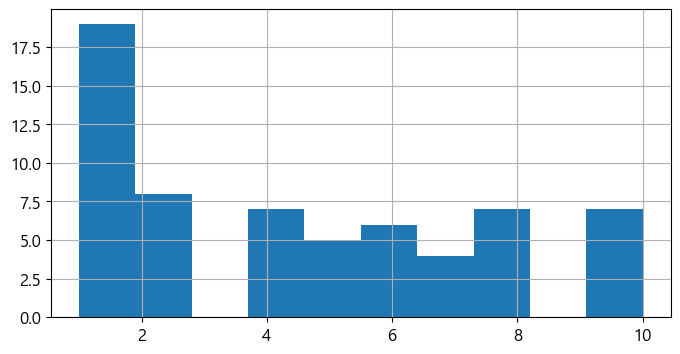

In [11]:
print(data['Score'].value_counts())
data['Score'].hist()

## Encoding

## one-hot-encoding
- mapping

 ## 긍정과 부정으로 리뷰 데이터를 분류
 - 각자 부여한 점수를 아래와 같이 두개 그룹으로 재설정

In [12]:
data.loc[data['Score'] >= 6, 'Label'] = 1
data.loc[data['Score'] < 6, 'Label'] = 0
col = ['Comment','Label']
data.loc[:,col]

,Comment,Label
0,황정민 배우님 보러 왔습니당,1.0
1,황정민 연기너무잘한다 그외는 별볼일 없다,1.0
2,혹시 없는 역시 황정민님!!,1.0
3,흠...그냥 할거 없음 보세요들,1.0
4,"황정민이 나와서 기대하고 봤는데, 이건 뭐 3류 범죄영화정도 밖에 안되겠네. 극장...",0.0
...,...,...
58,디워 이후로 최악의영화 이런영화를보고 별점 10점때리는 사람이 존재한다라는 인간의 ...,0.0
59,제발 영화감독 하지마세요…^^ 간만에 쓰레기 영화 봤네요 진짜 최악입니다 ㅋㅋ,0.0
60,코로나 만 아님 최소 500 만 이상은 됬었을것 같은데 아쉽네요 재미있게 잘봤어요~...,1.0
61,연기자분들 연기는 좋으나 영화각본이 많이 아쉽다…우리나라 영화수준인것 같다..,1.0


## wordcloud 표현하기

## 하나의 문서로 변환

#### 대상 텍스트 데이터

In [13]:
data1 = data.loc[data['Label'] == 1, ['Comment']]
data0 = data.loc[data['Label'] == 0, ['Comment']]
[x for x in data1['Comment']]

['황정민 배우님 보러 왔습니당',
 '황정민 연기너무잘한다 그외는 별볼일 없다',
 '혹시 없는 역시 황정민님!!',
 '흠...그냥 할거 없음 보세요들',
 '클리셰가 있긴 하지만 의외로 악역들의 개성과 연기가 좋아서 볼만 했고 악역들간의 다툼으로 생기는 내부 트러블도 재밌었다. 다만 전개가 예상이 가능한것이 한계.. 장르적 재미는 평타는 쳤다고 본다. 황정민은 역시 연기를 잘한다. 황정민의 실제 모습을 극한의 상황에 처한 모습밖에 볼수 없었던것이 아쉽다ㅋㅋ',
 '그냥 너랑 봐서 좋았던 것 같다',
 '황정민만 연기한 영화. 하,,, 보는내내 악당의 연기력이 거슬림. 애~매한 외모와 눈빛',
 '긴장감도 있고 볼만함',
 '황정민만이 할 수 있는 작품... 이유미 배우도 여기서 처음 봤네여.',
 '짱 재미잇게봣어요 황정민',
 '황정민만 믿고가도 킬링타임은 무난',
 '평점이 별로라 고민하다 봤는데 스릴있고 한순간도 지루하지 않았어요~황정민씬 역시 연기신이고 신예들도 연기 넘 잘하네요~ 간만에 재밌게 봤어요',
 '황정민의 연기는 좀 식상하지만 그럭저럭 볼만했고.. 무명배우들 살리는 영화인 것 같아서 보기 좋네요. 근데 우정출연.. 유명배우들은 오디서 나오는건지...ㅋ',
 '사실 카페 알바가 주범이었음. 납치 대상 물색',
 '배우들 연기력+연출 매우 사실적이어서 집에서 봤는데도 과몰입해서 봤다..코로나 종식 후에도 어디선가 다시 상영해준다면 영화관가서 한번 더 보고싶은 영화',
 '황정민 씌..씌 거리는 연기 싫어해서 별로 안 좋아하는데 황정민 말고도 요즘 넷플에서 핫한 한드 조연들 많이 나와서 볼 거리가 많아 볼만 했음. 쏘쏘',
 '너무 잼있었어요 역쉬 믿고보는 황정민배우님이였어요 박짐감 짱~^^',
 '황정민이었기에 긴장과 풀리는 순간이 적절했다',
 '대한민국 경찰 총은 항상 범인이 쏨 경찰은 절대 총 안쏨',
 '범인들 사연이라도 넣었으면 좋았을까..',
 '경찰이 견찰이란걸 여지없이 보여주는영화네요 ㅋㅋㅋ',
 '일단 긴장감 스릴있고 지루

In [14]:
text1 = ''
for para in data1['Comment']:
  text1 += para+'. '
print("text1", text1)

text0 = []
for para in data0['Comment']:
  text0.append(para)
text0 = ".".join(text0)
print("text0", text0)

text1 황정민 배우님 보러 왔습니당. 황정민 연기너무잘한다 그외는 별볼일 없다. 혹시 없는 역시 황정민님!!. 흠...그냥 할거 없음 보세요들. 클리셰가 있긴 하지만 의외로 악역들의 개성과 연기가 좋아서 볼만 했고 악역들간의 다툼으로 생기는 내부 트러블도 재밌었다. 다만 전개가 예상이 가능한것이 한계.. 장르적 재미는 평타는 쳤다고 본다. 황정민은 역시 연기를 잘한다. 황정민의 실제 모습을 극한의 상황에 처한 모습밖에 볼수 없었던것이 아쉽다ㅋㅋ. 그냥 너랑 봐서 좋았던 것 같다. 황정민만 연기한 영화. 하,,, 보는내내 악당의 연기력이 거슬림. 애~매한 외모와 눈빛. 긴장감도 있고 볼만함. 황정민만이 할 수 있는 작품... 이유미 배우도 여기서 처음 봤네여.. 짱 재미잇게봣어요 황정민. 황정민만 믿고가도 킬링타임은 무난. 평점이 별로라 고민하다 봤는데 스릴있고 한순간도 지루하지 않았어요~황정민씬 역시 연기신이고 신예들도 연기 넘 잘하네요~ 간만에 재밌게 봤어요. 황정민의 연기는 좀 식상하지만 그럭저럭 볼만했고.. 무명배우들 살리는 영화인 것 같아서 보기 좋네요. 근데 우정출연.. 유명배우들은 오디서 나오는건지...ㅋ. 사실 카페 알바가 주범이었음. 납치 대상 물색. 배우들 연기력+연출 매우 사실적이어서 집에서 봤는데도 과몰입해서 봤다..코로나 종식 후에도 어디선가 다시 상영해준다면 영화관가서 한번 더 보고싶은 영화. 황정민 씌..씌 거리는 연기 싫어해서 별로 안 좋아하는데 황정민 말고도 요즘 넷플에서 핫한 한드 조연들 많이 나와서 볼 거리가 많아 볼만 했음. 쏘쏘. 너무 잼있었어요 역쉬 믿고보는 황정민배우님이였어요 박짐감 짱~^^. 황정민이었기에 긴장과 풀리는 순간이 적절했다. 대한민국 경찰 총은 항상 범인이 쏨 경찰은 절대 총 안쏨. 범인들 사연이라도 넣었으면 좋았을까... 경찰이 견찰이란걸 여지없이 보여주는영화네요 ㅋㅋㅋ. 일단 긴장감 스릴있고 지루함없이 볼만함 황정민 수난영화인듯. 코로나 만 아님 최소 500 만 이상은 됬었을것 같은데 아쉽네요 재미있

## 탐색적 빈도 분석

### 형태소 분석기 이용, 명사만 추출

In [64]:
from konlpy.tag import Komoran
komoran = Komoran()
nouns1 = komoran.nouns(text1)
nouns0 = komoran.nouns(text0)
print("부정", nouns0[:10])
print("긍정", nouns1[:10])

부정 ['황정민', '기대', '이건', '범죄', '영화', '정도', '밖', '안', '극장', '시간']
긍정 ['황정민', '배우', '습', '당', '황정민', '연기', '외', '별', '볼일', '황정민']


## 데이터 분석

### 데이터 정제와 빈도 추출

In [62]:
nouns1 = [n for n in nouns1 if len(n) > 1] 
nouns0 = [n for n in nouns0 if len(n) > 1] 

In [65]:
nouns3 = []
for n in nouns1:
    if len(n) > 1:
        nouns3.append(n)
print(nouns3)

['황정민', '배우', '황정민', '연기', '볼일', '황정민', '!!', '할거', '보세', '요들', '클리셰', '악역', '개성', '연기', '좋아서', '악역', '다툼', '내부', '트러블', '전개', '예상', '한계', '장르', '재미', '황정민', '연기', '황정민', '실제', '모습', '극한', '상황', '모습', '황정민', '연기', '영화', '악당', '연기력', '매하', '외모', '눈빛', '긴장감', '황정민', '작품', '이유미', '배우', '처음', '재미', '황정민', '황정민', '킬링타임', '평점', '로라', '고민', '스릴', '한순간', '황정민', '연기', '신예', '연기', '간만', '황정민', '연기', '무명', '배우', '영화', '우정', '출연', '유명', '배우', '오디', '사실', '카페', '알바', '주범', '납치', '대상', '물색', '배우', '연기력', '연출', '사실', '몰입', '해서', '코로나', '종식', '상영', '영화관', '영화', '황정민', '거리', '연기', '황정민', '요즘', '조연', '거리', '황정민', '배우', '황정민', '긴장', '순간', '대한민국', '경찰', '범인', '경찰', '절대', '범인', '사연', '경찰', '이란', '영화', '긴장감', '스릴', '지루함', '황정민', '수난', '영화', '코로나', '최소', '이상', '!!', '시국', '영화', '한마디', '배우', '스텝', '응원', '한정', '제작비', '역경', '어려움', '생각', '우리', '!!', '연기자', '연기', '영화', '각본', '우리나라', '영화', '수준']


In [17]:
from collections import Counter
count1 = Counter(nouns1)
count0 = Counter(nouns0)
top1 = count1.most_common(100)
top0 = count0.most_common(100)
print(top1)
print(top0)

[('황정민', 16), ('연기', 9), ('영화', 8), ('배우', 7), ('!!', 3), ('경찰', 3), ('악역', 2), ('재미', 2), ('모습', 2), ('연기력', 2), ('긴장감', 2), ('스릴', 2), ('사실', 2), ('코로나', 2), ('거리', 2), ('범인', 2), ('볼일', 1), ('할거', 1), ('보세', 1), ('요들', 1), ('클리셰', 1), ('개성', 1), ('좋아서', 1), ('다툼', 1), ('내부', 1), ('트러블', 1), ('전개', 1), ('예상', 1), ('한계', 1), ('장르', 1), ('실제', 1), ('극한', 1), ('상황', 1), ('악당', 1), ('매하', 1), ('외모', 1), ('눈빛', 1), ('작품', 1), ('이유미', 1), ('처음', 1), ('킬링타임', 1), ('평점', 1), ('로라', 1), ('고민', 1), ('한순간', 1), ('신예', 1), ('간만', 1), ('무명', 1), ('우정', 1), ('출연', 1), ('유명', 1), ('오디', 1), ('카페', 1), ('알바', 1), ('주범', 1), ('납치', 1), ('대상', 1), ('물색', 1), ('연출', 1), ('몰입', 1), ('해서', 1), ('종식', 1), ('상영', 1), ('영화관', 1), ('요즘', 1), ('조연', 1), ('긴장', 1), ('순간', 1), ('대한민국', 1), ('절대', 1), ('사연', 1), ('이란', 1), ('지루함', 1), ('수난', 1), ('최소', 1), ('이상', 1), ('시국', 1), ('한마디', 1), ('스텝', 1), ('응원', 1), ('한정', 1), ('제작비', 1), ('역경', 1), ('어려움', 1), ('생각', 1), ('우리', 1), ('연기자', 1), ('각본', 1), ('우리나라', 1)

## 데이터 전처리

## 불용어 처리

In [18]:
kostw_data =  "https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt"
pd.read_csv(kostw_data).to_csv("ml_datas/korean_stopwords.txt", index=False, encoding="utf-8")

In [21]:
import re
stop_words=[]
with open("ml_datas/korean_stopwords.txt", 'r', encoding="utf-8") as f:
    while True:
        line = f.readline().strip()
        stop_words.append(line)
        if not line: break # line이 없으면 break
print(stop_words)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [24]:
stop_words = ['황정민', '영화']+stop_words
dic1 = dict(top1)
dic0 = dict(top0)
for word in stop_words:
    if word in dic1:
        del dic1[word]
    if word in dic0:
        del dic0[word]
print(dic1)
print(dic0)

{'연기': 9, '배우': 7, '!!': 3, '경찰': 3, '악역': 2, '재미': 2, '모습': 2, '연기력': 2, '긴장감': 2, '스릴': 2, '사실': 2, '코로나': 2, '거리': 2, '범인': 2, '볼일': 1, '할거': 1, '보세': 1, '요들': 1, '클리셰': 1, '개성': 1, '좋아서': 1, '다툼': 1, '내부': 1, '트러블': 1, '전개': 1, '예상': 1, '한계': 1, '장르': 1, '실제': 1, '극한': 1, '상황': 1, '악당': 1, '매하': 1, '외모': 1, '눈빛': 1, '작품': 1, '이유미': 1, '처음': 1, '킬링타임': 1, '평점': 1, '로라': 1, '고민': 1, '한순간': 1, '신예': 1, '간만': 1, '무명': 1, '우정': 1, '출연': 1, '유명': 1, '오디': 1, '카페': 1, '알바': 1, '주범': 1, '납치': 1, '대상': 1, '물색': 1, '연출': 1, '몰입': 1, '해서': 1, '종식': 1, '상영': 1, '영화관': 1, '요즘': 1, '조연': 1, '긴장': 1, '순간': 1, '대한민국': 1, '절대': 1, '사연': 1, '이란': 1, '지루함': 1, '수난': 1, '최소': 1, '시국': 1, '스텝': 1, '응원': 1, '한정': 1, '제작비': 1, '역경': 1, '어려움': 1, '생각': 1, '연기자': 1, '각본': 1, '우리나라': 1, '수준': 1}
{'연기': 9, '배우': 5, '연출': 5, '쓰레기': 5, '스토리': 3, '한국': 3, '내용': 3, '사람': 3, '감독': 3, '이건': 2, '정도': 2, '제외': 2, '경찰': 2, '보기': 2, '80년대': 2, '중간': 2, '초반': 2, '설정': 2, '이거': 2, '몰입': 2, '알바': 2, '형사': 2, '여자': 2, '인질

## 빈도 그래프 그리기

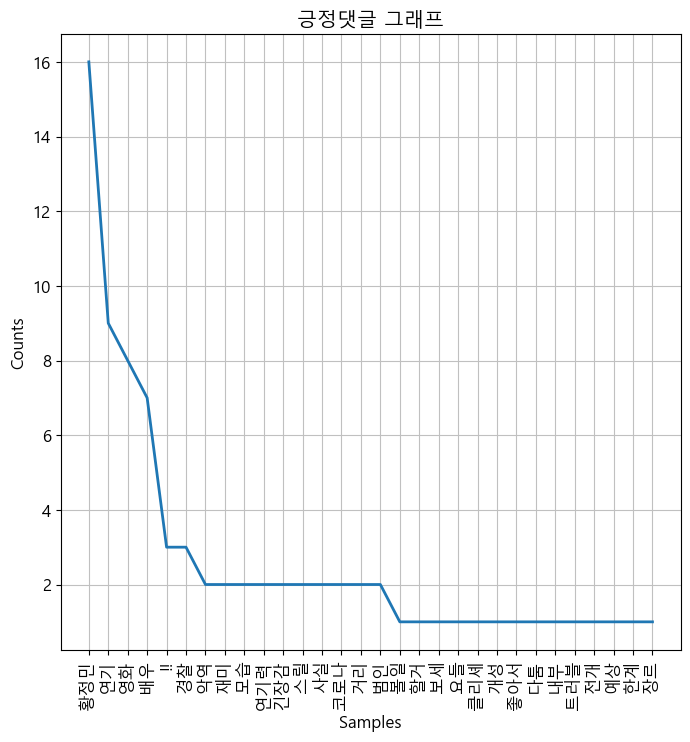

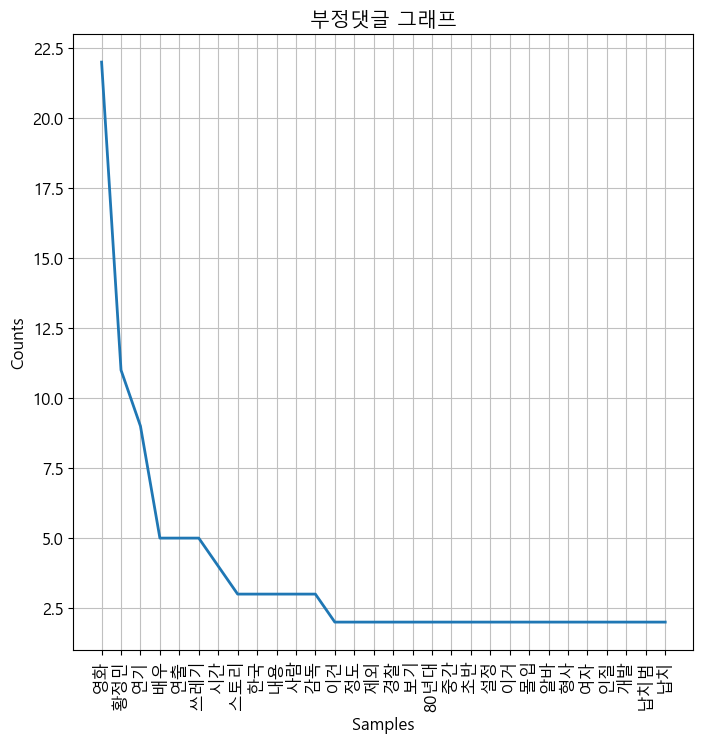

<Axes: title={'center': '부정댓글 그래프'}, xlabel='Samples', ylabel='Counts'>

In [26]:
import nltk
import matplotlib.pyplot as plt
pos = nltk.Text(nouns1)
neg = nltk.Text(nouns0)
plt.figure(figsize=(8,8))
plt.title("긍정댓글 그래프")
pos.plot(30) 

plt.figure(figsize=(8,8))
plt.title("부정댓글 그래프")
neg.plot(30)

## 워드 클라우드로 시각화
- pip install wordcloud

## 이미지로 마스킹하기

In [35]:
import numpy as np
from PIL import Image

In [36]:
icon = Image.open('images/apple.png').convert("RGBA")
# icon = Image.open('images/heart.png').convert("RGBA")
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

In [30]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## 그림을 배경으로 워드 클라우딩을 그리기

(-0.5, 599.5, 599.5, -0.5)

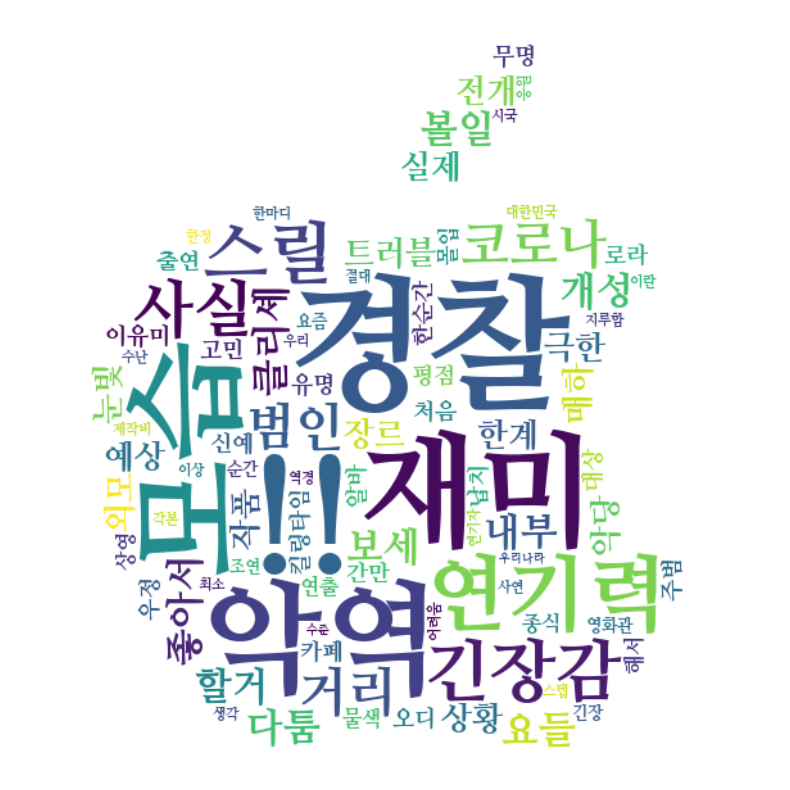

In [37]:
stop_words = ['영화','황정민','배우','연기']
dic1 = dict(top1)
[dic1.pop(key) for key in stop_words]
f_path = 'fonts/NanumMyeongjoExtraBold.ttf'
wordcloud = WordCloud(font_path=f_path,
                      background_color='white', 
                      width=800, 
                      height=800,
                      mask=mask).generate_from_frequencies(dic1)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

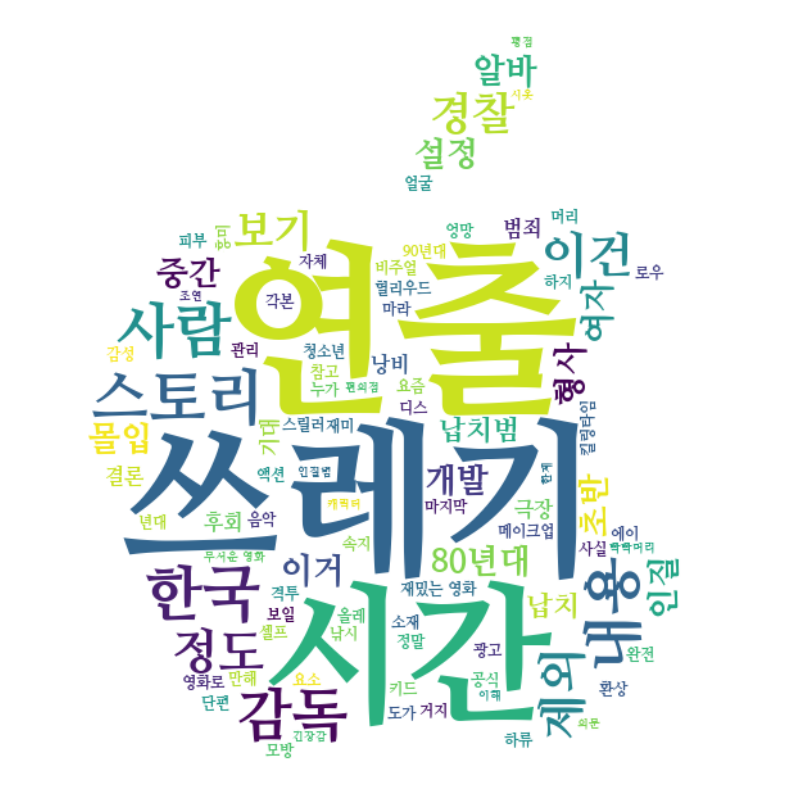

In [38]:
stop_words = ['영화','황정민','배우','연기']
dic0 = dict(top0)
[dic0.pop(key) for key in stop_words]
f_path = 'fonts/NanumMyeongjoExtraBold.ttf'
wordcloud = WordCloud(font_path=f_path,
                      background_color='white', 
                      width=800, 
                      height=800,
                      mask=mask).generate_from_frequencies(dic0)
fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')